In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")
team_id = 6

# Importing dataset. Taking Sample (df)

In [17]:
# read data, extract sample
data = pd.read_csv("Student_Performance_Factors.csv")
df = data.sample(n=1000, random_state=team_id)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2150,19,64,Low,Medium,Yes,9,81,High,Yes,0,Medium,High,Public,Neutral,3,Yes,High School,Near,Male,62
3363,12,69,High,Low,No,7,70,Medium,Yes,1,Medium,Medium,Private,Positive,4,No,High School,Near,Male,62
5495,12,97,Low,Medium,Yes,6,79,Medium,No,1,Medium,Medium,Public,Negative,2,No,High School,Near,Male,65
3906,28,80,Medium,High,No,6,96,High,Yes,2,Low,Medium,Public,Positive,6,No,High School,Near,Male,73
2781,16,89,High,Medium,Yes,7,83,High,Yes,0,Low,High,Public,Positive,4,No,Postgraduate,Moderate,Male,70


# Data Description

| Attribute                      | Description                                                                   |
|:-------------------------------|:------------------------------------------------------------------------------|
| **Hours_Studied**              | Number of hours spent studying per week.                                      |
| **Attendance**                 | Percentage of classes attended.                                               |
| **Parental_Involvement**       | Level of parental involvement in the student's education (Low, Medium, High). |
| **Access_to_Resources**        | Availability of educational resources (Low, Medium, High).                    |
| **Extracurricular_Activities** | Participation in extracurricular activities (Yes, No).                        |
| **Sleep_Hours**                | Average number of hours of sleep per night.                                   |
| **Previous_Scores**            | Scores from previous exams.                                                   |
| **Motivation_Level**           | Student's level of motivation (Low, Medium, High).                            |
| **Internet_Access**            | Availability of internet access (Yes, No).                                    |
| **Tutoring_Sessions**          | Number of tutoring sessions attended per month.                               |
| **Family_Income**              | Family income level (Low, Medium, High).                                      |
| **Teacher_Quality**            | Quality of the teachers (Low, Medium, High).                                  |
| **School_Type**                | Type of school attended (Public, Private).                                    |
| **Peer_Influence**             | Influence of peers on academic performance (Positive, Neutral, Negative).     |
| **Physical_Activity**          | Average number of hours of physical activity per week.                        |
| **Learning_Disabilities**      | Presence of learning disabilities (Yes, No).                                  |
| **Parental_Education_Level**   | Highest education level of parents (High School, College, Postgraduate).      |
| **Distance_from_Home**         | Distance from home to school (Near, Moderate, Far).                           |
| **Gender**                     | Gender of the student (Male, Female).                                         |
| **Exam_Score**                 | Final exam score.                                                             |

# Data Cleaning

Removing duplicates

In [18]:
df = df.drop_duplicates()
df.shape

(1000, 20)

Check missing value

In [19]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               10
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      14
Distance_from_Home             8
Gender                         0
Exam_Score                     0
dtype: int64

There are $3$ categorical variables with missing values: `Teacher_Quality`, `Parental_Education_Level`, `Distance_from_Home`.

Keeping missing values will cause some bias in our analysis; therefore, we must handle them. One common way is to **Remove rows with null values**, but this way depends on the context and the importance of these rows. To see whether these rows are important, we can perform a statistical test to determine if the missing values are randomly distributed or if they have a pattern.

For the statistical test, we use **Chi-Square test** to determine if there is a significant association between two categorical variables. In this case, we are interested in understanding if the missingness of `Teacher_Quality` is associated with `Exam_Score`. We have 2 hypotheses:
\begin{cases}
H_0: \text{No Association} \\
H_1: \text{Association}
\end{cases}

Suppose our significant level is $0.05$, and we want to calculate whether $p > 0.05$, where $p$ is the p-value from the test. If so, keep $H_0$. Else, reject $H_0$.


For `Teacher_Quality`:

In [20]:
contingency_table = pd.crosstab(df['Teacher_Quality'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.18622946332728363


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Teacher_Quality` and `Exam_Score`, we can safely remove rows without introducing bias.

In [21]:
# Remove null values in Teacher 
df = df.dropna(subset=['Teacher_Quality'])

For `Parental_Education_Level`:

In [22]:
contingency_table = pd.crosstab(df['Parental_Education_Level'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.9422160179145131


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Parental_Education_Level` and `Exam_Score`, we can safely remove rows without introducing bias.

In [23]:
df = df.dropna(subset=['Parental_Education_Level'])

For `Distance_from_Home`:

In [24]:
contingency_table = pd.crosstab(df['Distance_from_Home'].isnull(), df['Exam_Score'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"p-value: {p}")

p-value: 0.677500284929728


$p > 0.05$, so we cannot reject the null hypothesis. Since there is no association between the missingness of `Distance_from_Home` and `Exam_Score`, we can safely remove rows without introducing bias.

In [25]:
df = df.dropna(subset=['Distance_from_Home'])

In [26]:
# Recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 2150 to 4450
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               969 non-null    int64 
 1   Attendance                  969 non-null    int64 
 2   Parental_Involvement        969 non-null    object
 3   Access_to_Resources         969 non-null    object
 4   Extracurricular_Activities  969 non-null    object
 5   Sleep_Hours                 969 non-null    int64 
 6   Previous_Scores             969 non-null    int64 
 7   Motivation_Level            969 non-null    object
 8   Internet_Access             969 non-null    object
 9   Tutoring_Sessions           969 non-null    int64 
 10  Family_Income               969 non-null    object
 11  Teacher_Quality             969 non-null    object
 12  School_Type                 969 non-null    object
 13  Peer_Influence              969 non-null    object


# Descriptive Statistics

## Graphical Method

### Univariate Data

#### Demographic Data

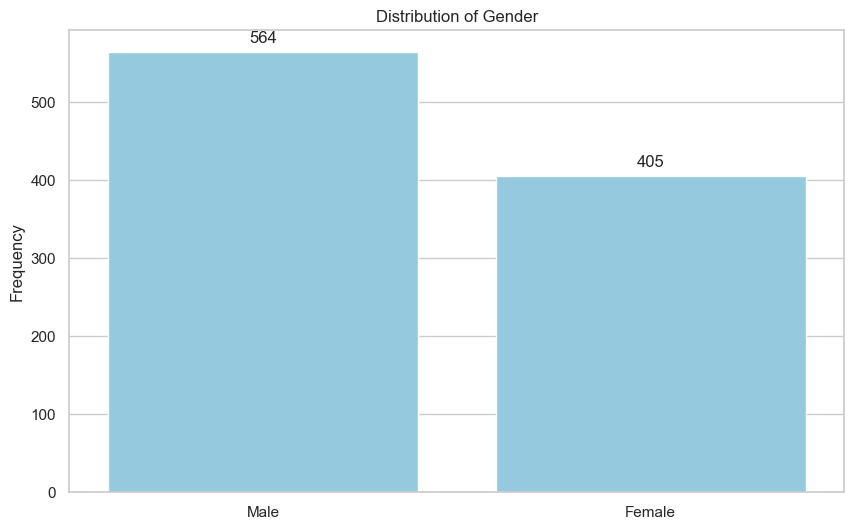

In [27]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = df['Gender'], color = 'skyblue')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Distribution of Gender")
plt.xlabel("")
plt.ylabel("Frequency")
plt.show()

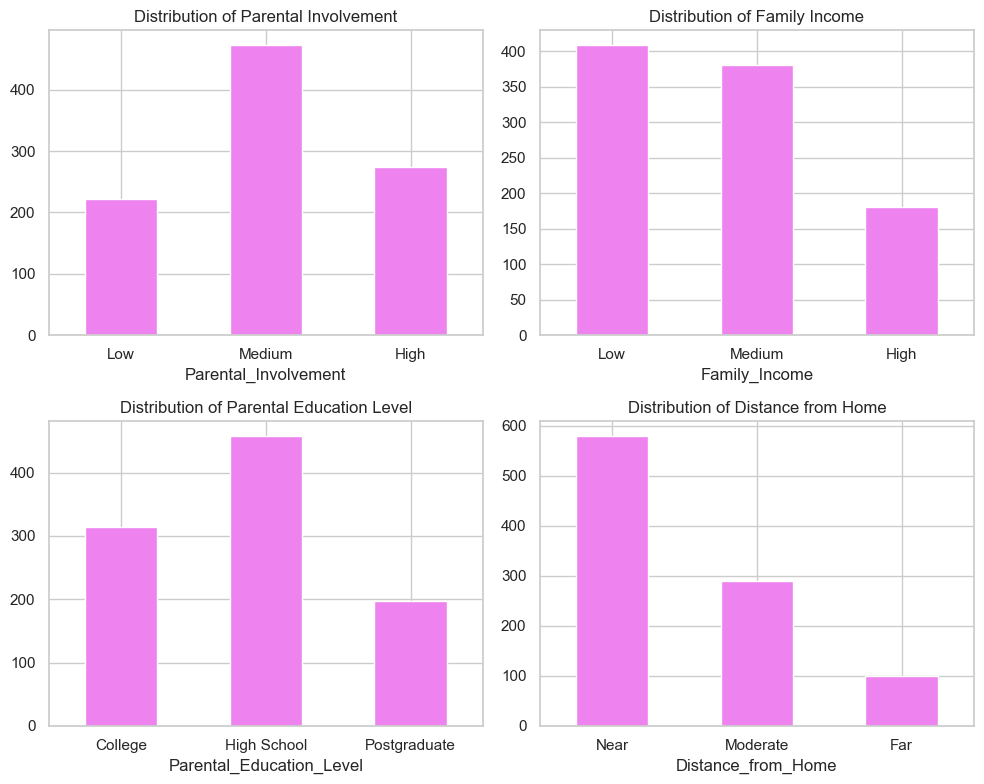

In [28]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
columns = ['Parental_Involvement', 'Family_Income', 'Parental_Education_Level', 'Distance_from_Home']
for i, col in enumerate(columns):
    ax = axs[i//2, i % 2]
    if col in ['Parental_Involvement', 'Family_Income', 'Distance_from_Home']:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High', 'Near', 'Moderate', 'Far']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color="violet")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

#### Behavioral Data

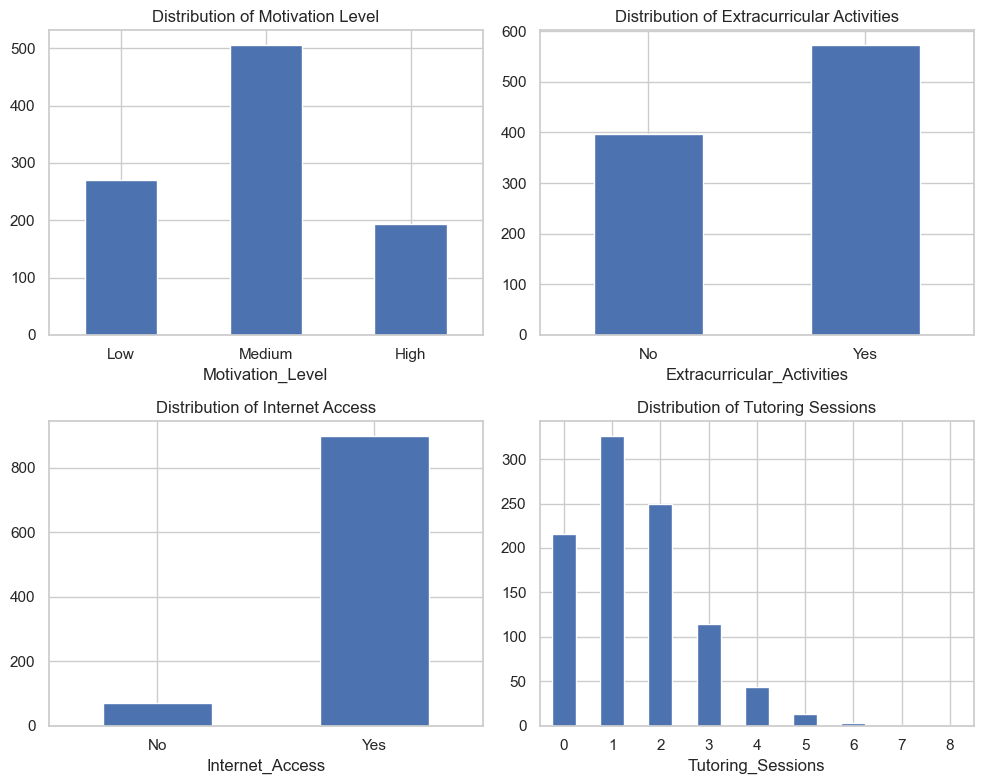

In [29]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
columns = ['Motivation_Level', 'Extracurricular_Activities', 'Internet_Access', 'Tutoring_Sessions']
for i, col in enumerate(columns):
    ax = axs[i//2, i % 2]
    if col in ["Motivation_Level"]:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

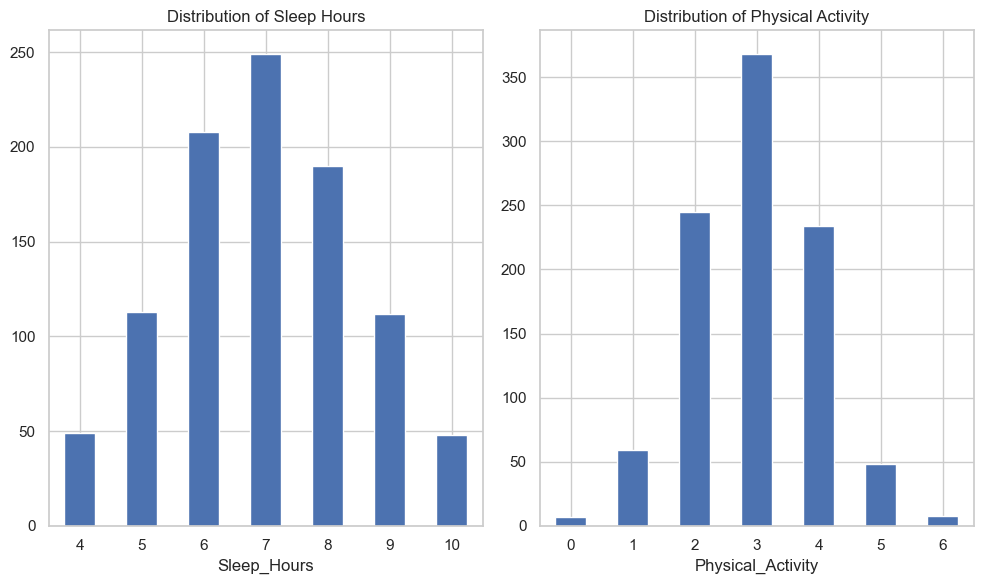

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
columns = ['Sleep_Hours', 'Physical_Activity']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

#### Institutional Data 
Note: Public/Private School doesn't matter, so ignore `School_Type`

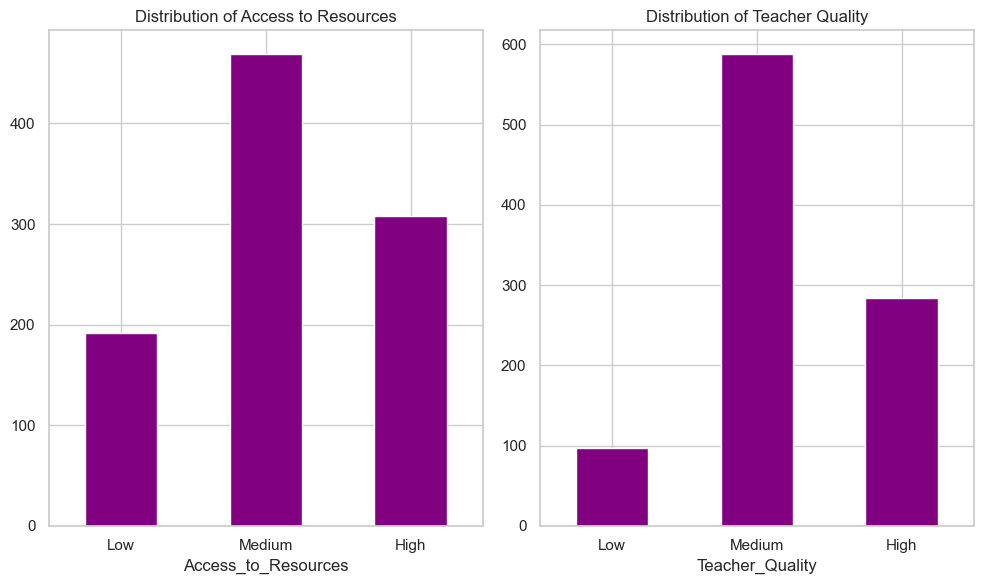

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
columns = ['Access_to_Resources', 'Teacher_Quality']
for i, col in enumerate(columns):
    ax = axs[i]
    if col in ['Access_to_Resources', 'Teacher_Quality']:
        sorted_values = df[col].value_counts().reindex(['Low', 'Medium', 'High']).dropna()
    else:
        sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color = "purple")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(f"Distribution of {col.replace("_", " ")}")

plt.tight_layout()
plt.show()

#### Social and Environmental Data

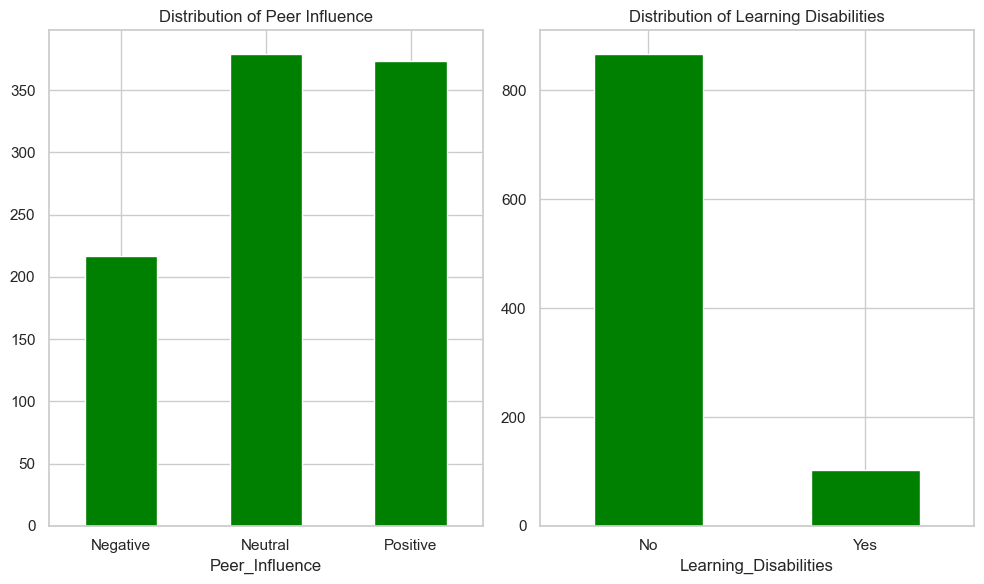

In [32]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
columns = ['Peer_Influence', 'Learning_Disabilities']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='bar', ax=ax, color = "green")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=  0)
    ax.set_title(f"Distribution of {col.replace('_', ' ')}")

plt.tight_layout()
plt.show()

#### Academic Data

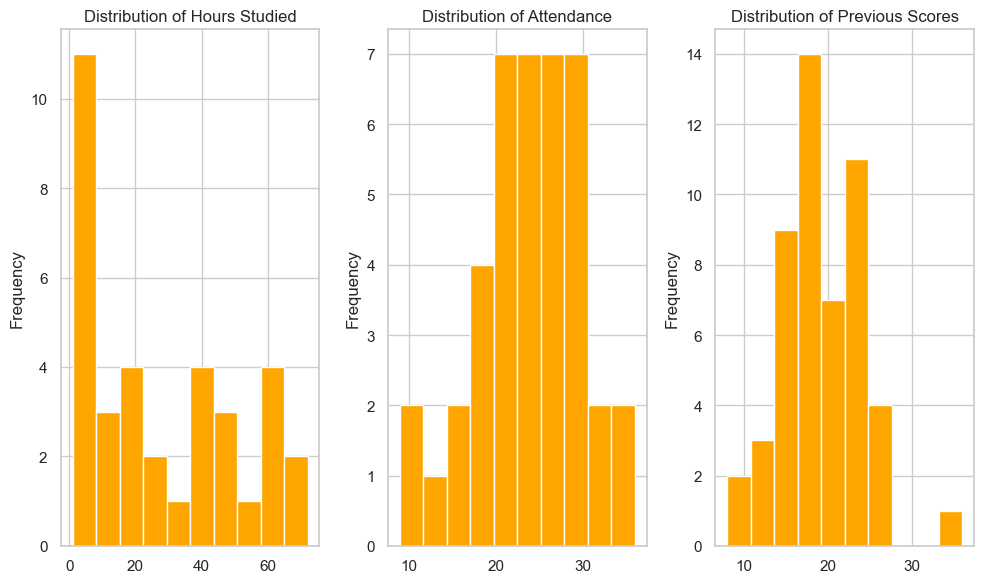

In [33]:
fig, axs = plt.subplots(1, 3, figsize = (10, 6))
columns = ['Hours_Studied', 'Attendance', 'Previous_Scores']
for i, col in enumerate(columns):
    ax = axs[i]
    sorted_values = df[col].value_counts().sort_index()
    sorted_values.plot(kind='hist', ax=ax, color = "orange")
    ax.set_title(f"Distribution of {col.replace('_', ' ')}")

plt.tight_layout()
plt.show()

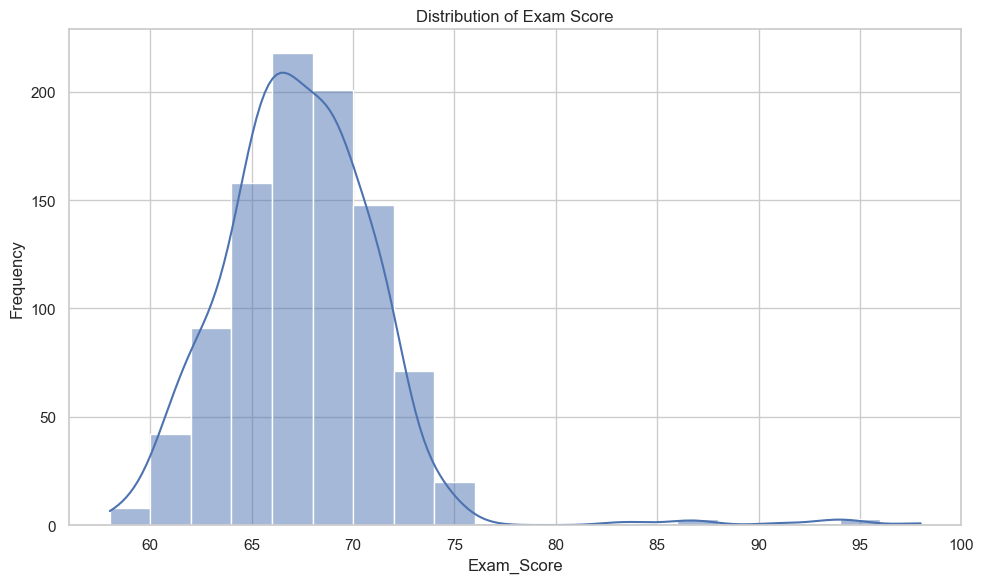

In [34]:
plt.figure(figsize = (10, 6))
col = "Exam_Score"
sns.histplot(data = df[col], kde = True, bins = 20)
plt.title(f"Distribution of {col.replace('_', ' ')}")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Bivariate Data

Relationship between **Hours Studied** and **Exam Score**

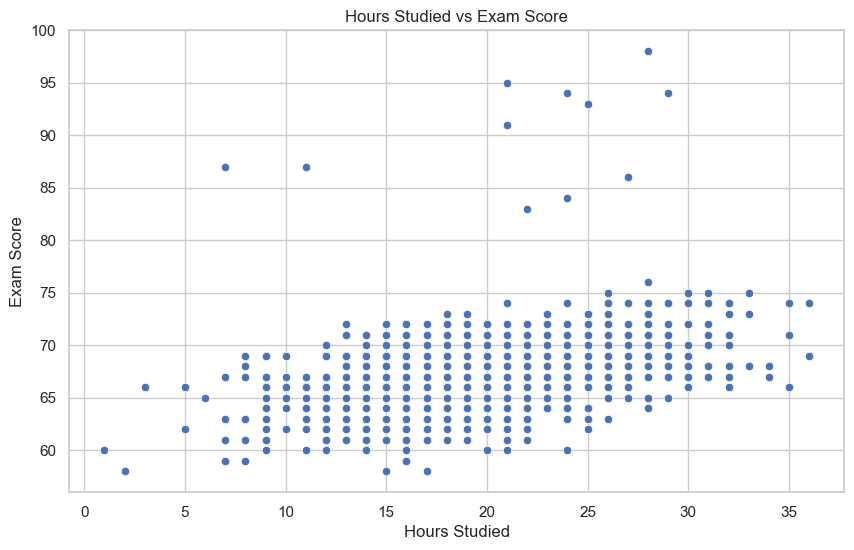

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()


1.	Positive Trend: There is a general positive correlation between hours studied and exam score. As students study more hours, their exam scores tend to increase.
2.	Score Variability:
- At lower study hours, scores are clustered around 60–70, indicating limited preparation leads to average or below-average performance.
- At higher study hours, scores vary widely (from about 70 to 100), suggesting diminishing returns or variations in individual performance despite extended study.
3.	Plateau Effect: After around 20–25 hours of studying, the improvement in exam scores levels off for many students, indicating that more studying does not always result in proportionally higher scores.
4.	Outliers: Some points deviate from the trend, such as students studying few hours but scoring high or studying many hours but scoring low. These could represent exceptional cases, external factors, or differences in learning efficiency.

Overall, the graph suggests studying more hours generally improves scores but highlights variability in outcomes based on individual factors.

Relationship between **Sleep Hours** and **Exam Score**

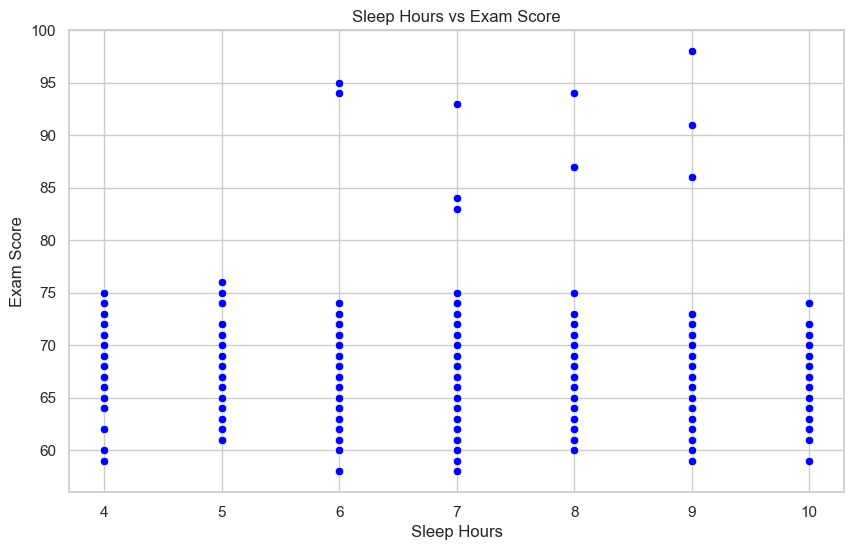

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=df, color = "blue")
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()


1.	General Trend:
- Exam scores are concentrated around the same median value across all sleep durations.
- This suggests no strong linear relationship between sleep hours and exam scores.
2.	Outliers:
- Outliers (exam scores significantly above the box plot range) are visible for 7-10 sleep hours, showing some students perform exceptionally well in this range.
- For lower sleep hours (4-6), fewer high scores are observed.
3.	Consistency:
- The interquartile range (IQR), which shows score variability, remains consistent across all sleep durations, suggesting that performance is relatively stable regardless of sleep hours.
4.	Median Scores:
- The median exam scores for different sleep hours are fairly similar, all clustering between 65 and 70.
5. Implication
- While adequate sleep (7-10 hours) is associated with higher outliers (exceptional scores), the overall exam scores do not vary significantly with sleep duration. Sleep hours may not strongly impact average performance, but better sleep may benefit exceptional performance.

Relationship between **Attendance** and **Exam Score**

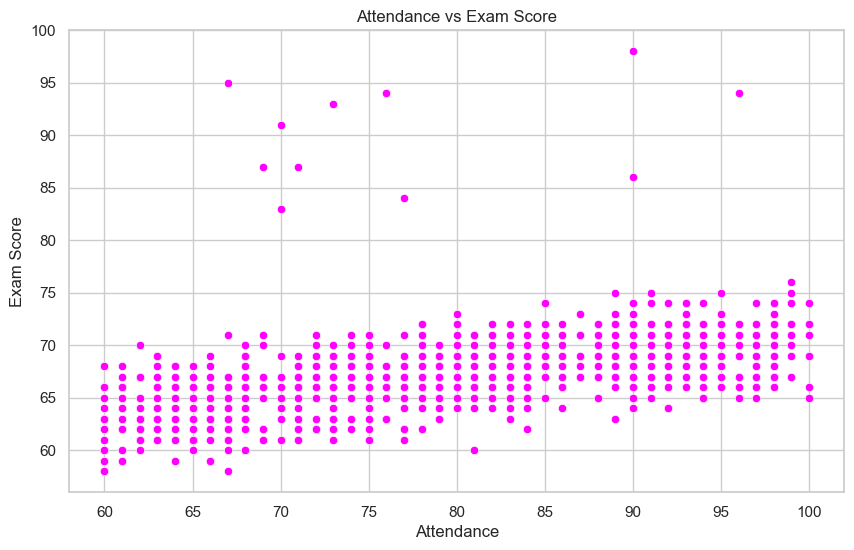

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df, color = "magenta")
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()


1.	Positive Correlation:
- Higher attendance correlates to higher exam score, as can be seen in the graph.
2.	Cluster of Scores:
- A dense concentration of exam score is seen between 60-75 across all attendance levels, indicating average performance.
- Exceptionally higher scores are mostly seen for students with attendance at least 70%.

3. Implication
- Improving attendance seems to positively influence exam performance, as students with higher attendance achieve better scores more consistently.

Relationship between **Tutoring Sessions** and **Exam Score**

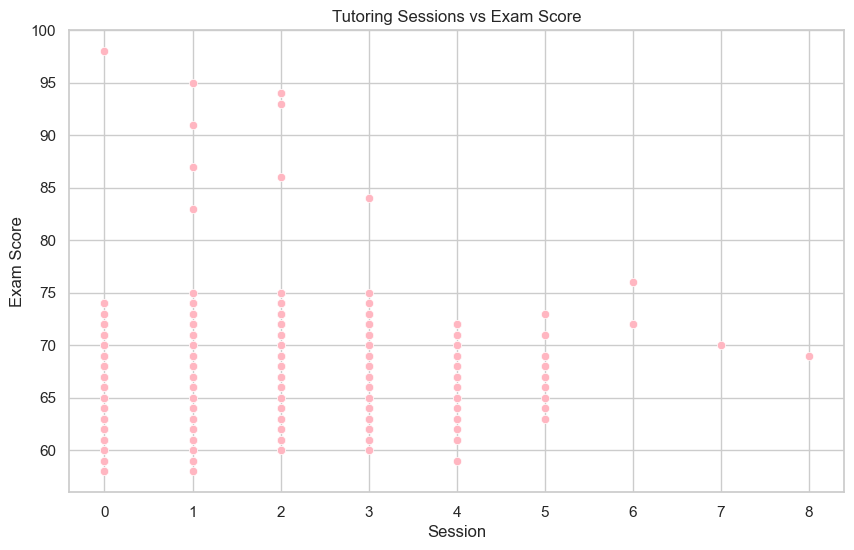

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tutoring_Sessions', y='Exam_Score', data=df, color = "lightpink")
plt.title('Tutoring Sessions vs Exam Score')
plt.xlabel('Session')
plt.ylabel('Exam Score')
plt.show()


1. No Strong Trend:
- There does not appear to be a clear upward or downward trend in exam scores based on the number of tutoring sessions.
- Students across all sessions (0–8) achieve scores distributed around 60–75, indicating inconsistent correlation.

2. High Scores:
- Exceptional exam scores (above 85–95) are observed primarily at 0 to 3 sessions.
- This suggests that some students perform exceptionally well even with minimal tutoring sessions.

3. Score Distribution:
- The majority of exam scores fall within the 60–75 range, regardless of tutoring frequency.
- For higher sessions (4–8), the concentration of scores appears to shrink slightly, with fewer high achievers.

4. Limited Data for High Sessions:
- There are fewer data points for students attending 6 or more sessions, which makes it difficult to draw strong conclusions about their performance.

5. Implication:
- The number of tutoring sessions does not clearly correlate with exam scores. Exceptional performance can occur with minimal tutoring, while consistent average scores dominate across all session counts. More data for higher session counts may clarify this pattern.

Relationship between **Physical Activity** and **Current Score**

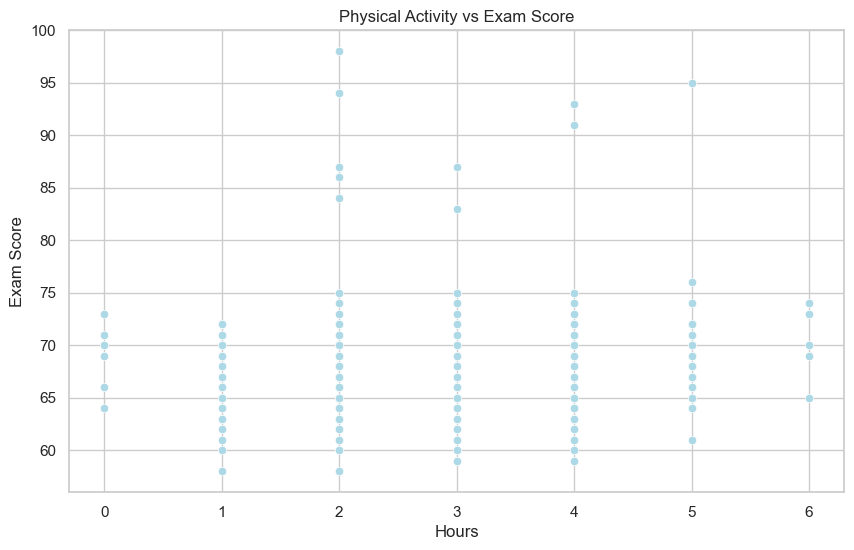

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical_Activity', y='Exam_Score', data=df, color = "lightblue")
plt.title('Physical Activity vs Exam Score')
plt.xlabel('Hours')
plt.ylabel('Exam Score')
plt.show()


1. Median Exam Scores:
- The median exam scores are fairly consistent across all physical activity levels but show a slight upward trend for higher activity hours (5–6 hours).

2. Outliers:
- High outliers (scores above 85–95) are present for 2 to 6 hours of physical activity, suggesting that moderate to higher activity levels are associated with exceptional performance.
- Students with 0 or 1 hour of activity have fewer exceptional scores.

3. Score Distribution:
- 0–3 hours of physical activity show similar interquartile ranges (IQR), meaning most scores are concentrated between 65–72.
- For 4–6 hours, the IQR shifts slightly upward, indicating improved performance for some students.

4. Performance Stability:
- The range of scores becomes slightly narrower at 6 hours, with fewer low scores (around 60) and a higher overall median.

5. Implication:
- While physical activity does not drastically influence average exam scores, higher physical activity levels (4–6 hours) are associated with improved median scores and more high-performing outliers. Moderate activity may benefit overall performance.

Relationship between **Parental Education Level** and **Parental Involvement**

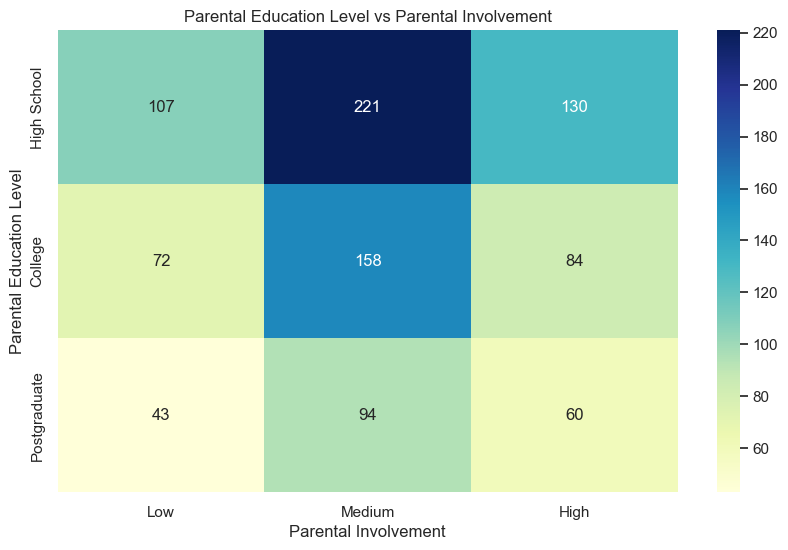

In [40]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['Parental_Education_Level'], df['Parental_Involvement']).reindex(index=['High School', 'College', 'Postgraduate'], columns=['Low', 'Medium', 'High'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Parental Education Level vs Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Parental Education Level')
plt.show()


1. Key Observations:
- High School Parents:
- Medium Involvement has the highest count (220+).
- High Involvement follows with 130, while Low Involvement has around 110.
- Suggests that most high school-educated parents exhibit medium to high involvement.
- College Parents:
- Medium Involvement is dominant (160+).
- High Involvement is 84, while Low Involvement is 72.
- Indicates a trend toward medium parental involvement.
- Postgraduate Parents:
- Parental involvement declines overall as education increases.
- Medium Involvement leads with 94, followed by High Involvement (60) and Low Involvement (43).

2. General Trend:
- Parents with higher education levels (Postgraduate) show lower counts of high involvement compared to parents with lower education levels (High School).
- Medium involvement is the most common category across all education levels.

3. Implication:
- Parents with a high school education are more likely to show medium or high involvement.
- Involvement decreases slightly for parents with college and postgraduate education, possibly due to time constraints or other commitments.
- Educational initiatives could target involvement among highly educated parents to encourage greater participation.

Relationship between **Internet Access** and **Access to Resources**

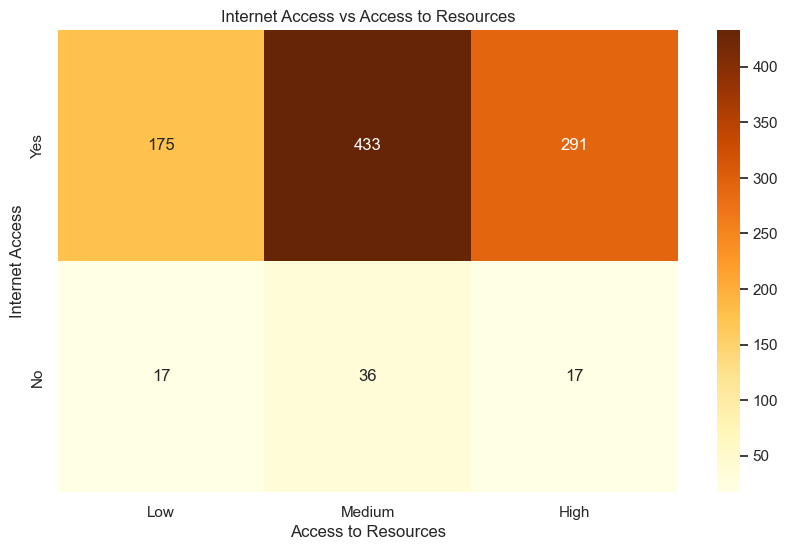

In [41]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['Internet_Access'], df['Access_to_Resources']).reindex(index = ['Yes', 'No'], columns = ['Low', 'Medium', 'High'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlOrBr")
plt.title('Internet Access vs Access to Resources')
plt.xlabel('Access to Resources')
plt.ylabel('Internet Access')
plt.show()


1. General Trend:
- Internet Access significantly impacts access to resources:
- Individuals with internet access are more likely to have medium to high resources.
- Individuals without internet access have minimal access to resources, highlighting a digital divide.

2. Implication:
- Improving internet access can potentially bridge the gap in resource availability, as there is a strong association between internet access and better access to resources.

Relationship between **Peer Influence** and **Motivation Level**

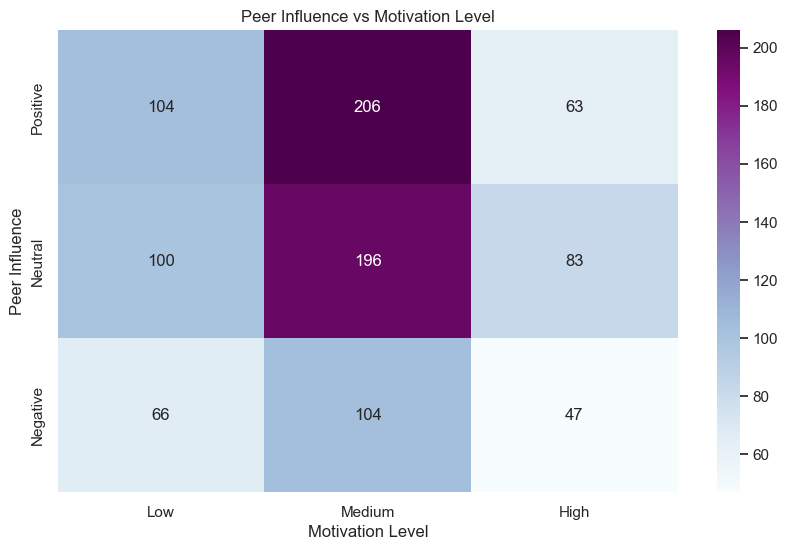

In [42]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['Peer_Influence'], df['Motivation_Level']).reindex(index=['Positive', 'Neutral', 'Negative'], columns=['Low', 'Medium', 'High'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="BuPu")
plt.title('Peer Influence vs Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Peer Influence')
plt.show()


1. General Trends:
- Medium Motivation is the most common across all peer pressure types.
- Positive Peer Pressure has the largest impact, as it shows the highest counts for motivation.
- Negative Peer Pressure significantly reduces motivation levels, with minimal individuals reaching high motivation.

2. Implication:

- Encouraging positive peer environments can help enhance motivation levels, especially shifting individuals toward medium and high motivation. Negative peer pressure should be mitigated to avoid dampening motivation.

Relationship betwen **Teacher Quality** and **Motivation Level**

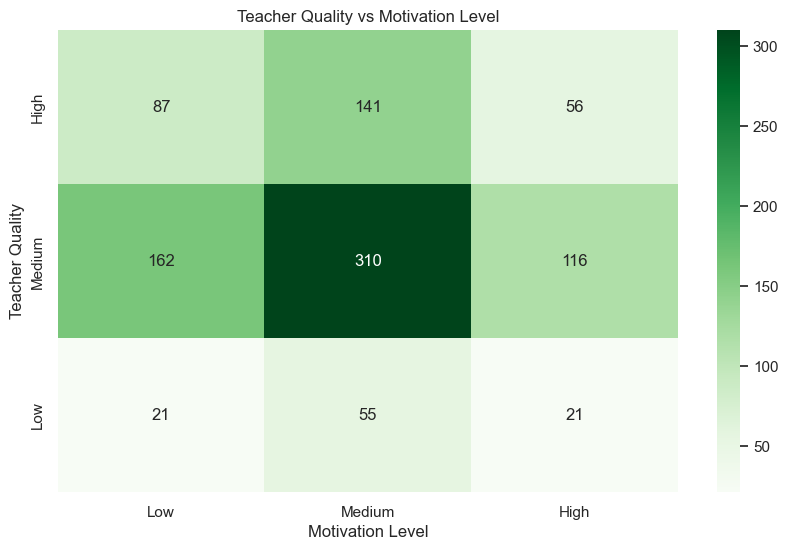

In [43]:
plt.figure(figsize=(10, 6))
heatmap_data = pd.crosstab(df['Teacher_Quality'], df['Motivation_Level']).reindex(index=['High', 'Medium', 'Low'], columns=['Low', 'Medium', 'High'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="Greens")
plt.title('Teacher Quality vs Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Teacher Quality')
plt.show()


1. General Trends:
- Medium Motivation dominates across all teacher quality levels.
- High Teacher Quality does not guarantee higher motivation, as counts for high motivation are still relatively low.
- Low Teacher Quality results in minimal motivation at all levels.

2. Implication:
- Improving teacher quality can positively influence motivation, but other factors likely play a role in achieving high motivation levels. Focus should be on enhancing both teacher quality and additional support systems to encourage higher student motivation.

Relationship between **Motivation Level** and **Exam Score**

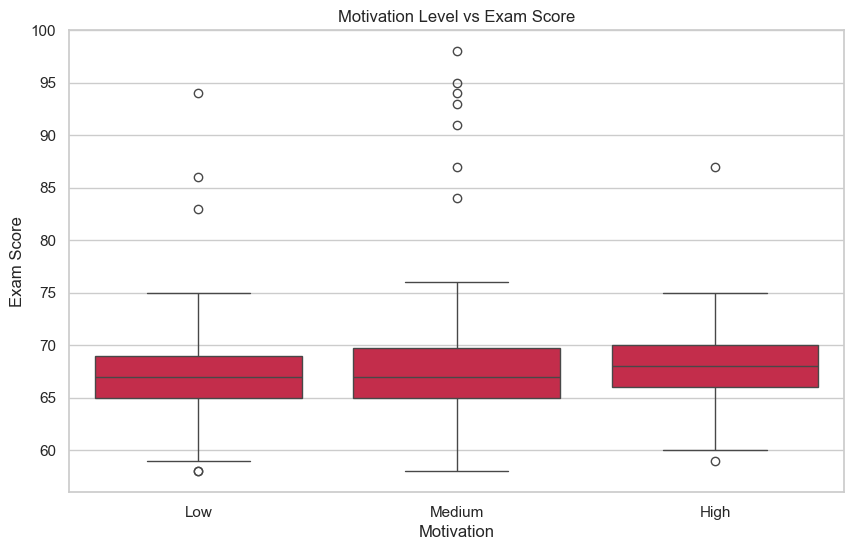

In [44]:
plt.figure(figsize=(10, 6))
df['Motivation_Level'] = pd.Categorical(df['Motivation_Level'], categories=['Low', 'Medium', 'High'], ordered=True)
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=df, color="crimson")
plt.title('Motivation Level vs Exam Score')
plt.xlabel('Motivation')
plt.ylabel('Exam Score')
plt.show()


1. General Trend:
- While High Motivation students exhibit slightly more consistent performance, the median scores across all groups remain similar.
- Medium Motivation still produces high-performing outliers, suggesting that motivation alone is not the sole factor driving exceptional exam performance.
2. Outliers:
- High-performing outliers (above 85) are present in all motivation levels, particularly in the High and Medium Motivation groups.
- Fewer exceptional scores are visible in the Low Motivation group.
3. Consistency:
- High Motivation shows the most consistent performance (narrow IQR).
- Low Motivation has a slightly broader range, indicating more variability in performance.
4. Implication
- Motivation level influences consistency and the likelihood of exceptional performance. Supporting students with high motivation can maximize their potential, while identifying and assisting low-motivation groups may help reduce score variability and improve overall performance.

Relationship between **Parental_Involvement** and **Exam Score**

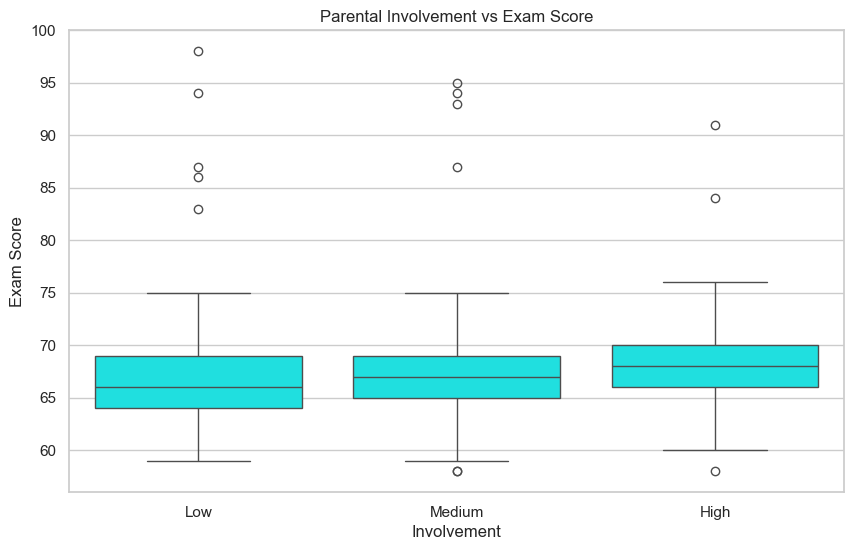

In [45]:
plt.figure(figsize=(10, 6))
df['Parental_Involvement'] = pd.Categorical(df['Parental_Involvement'], categories=['Low', 'Medium', 'High'], ordered=True)
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df, color="aqua")
plt.title('Parental Involvement vs Exam Score')
plt.xlabel('Involvement')
plt.ylabel('Exam Score')
plt.show()


1.	Exam Score Distribution:
- The median exam scores are quite similar across all three levels of parental involvement.
- Median values (central line of the boxes) seem to hover around 65-68.
2.	Outliers:
- Outliers are observed across all categories, with some students achieving very high scores (above 90).
- High involvement shows fewer high outliers compared to Low and Medium.
3.	Spread (Variability):
- The interquartile range (IQR), represented by the box, appears similar across all categories.
- Whiskers extend slightly further for “Medium” and “High” involvement, suggesting greater variability.
4.	Conclusion:
- Parental involvement (Low, Medium, High) does not strongly influence the overall median exam score.
- However, all groups contain students with exceptional performance, possibly indicating that other factors influence high achievement.

Relationship betweeen **Access to Resources** and **Exam Score**

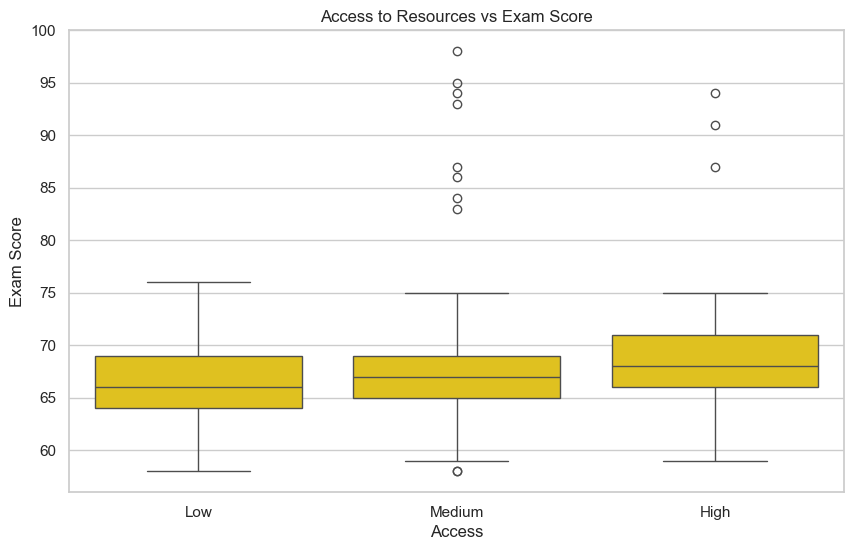

In [46]:
plt.figure(figsize=(10, 6))
df['Access_to_Resources'] = pd.Categorical(df['Access_to_Resources'], categories=['Low', 'Medium', 'High'], ordered=True)
sns.boxplot(x='Access_to_Resources', y='Exam_Score', data=df, color="gold")
plt.title('Access to Resources vs Exam Score')
plt.xlabel('Access')
plt.ylabel('Exam Score')
plt.show()


1.	Median Scores:
- The medians for all three categories (Low, Medium, and High) are similar, hovering between 66-70.
- However, the High Access group shows a slightly higher median compared to the other two.
2.	Spread (Variability):
- The interquartile range (IQR) for “High Access” is slightly wider than for “Low” and “Medium” Access groups, indicating more variability in scores.
- The whiskers for all groups are relatively similar in range.
3.	Outliers:
- All groups have outliers, particularly students scoring above 85.
- “Medium Access” shows a higher concentration of extreme outliers (above 90).
4.	Conclusion:
- Access to resources does not drastically influence the median exam score, but students with higher access tend to have slightly higher scores and more variability.
- Exceptional performances (outliers) are seen across all groups, suggesting other factors might play a role in individual success.

Relationship between **Learning Disabilities** and **Exam Score**

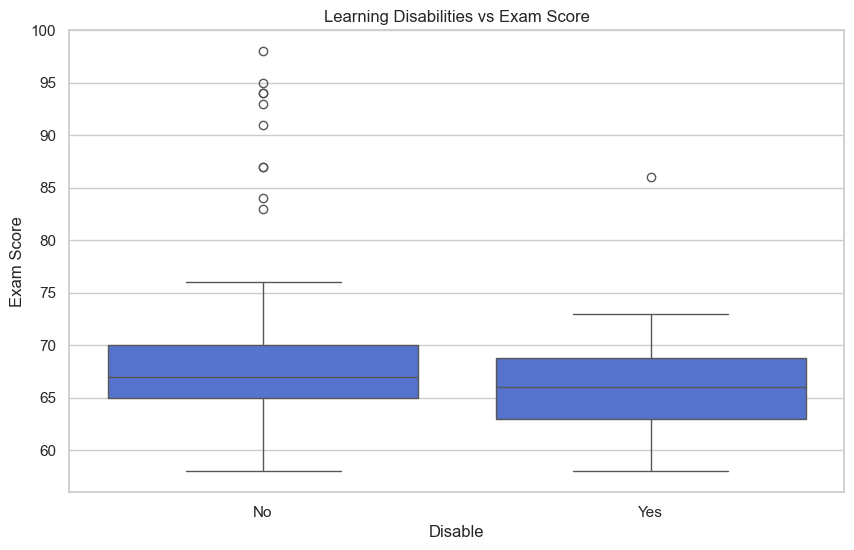

In [47]:
plt.figure(figsize=(10, 6))
df['Learning_Disabilities'] = pd.Categorical(df['Learning_Disabilities'], categories=['No', 'Yes'], ordered=True)
sns.boxplot(x='Learning_Disabilities', y='Exam_Score', data=df, color="royalblue")
plt.title('Learning Disabilities vs Exam Score')
plt.xlabel('Disable')
plt.ylabel('Exam Score')
plt.show()


1.	Median Scores:
- The median exam score for students without learning disabilities is slightly higher than those with learning disabilities.
- Both medians fall around the 65-70 range, but the “No” group has a slight advantage.
2.	Spread (Variability):
- The interquartile range (IQR) for both groups is quite similar, showing comparable score distributions.
- The whiskers (range) are slightly shorter for the “Yes” group, suggesting less variability in their scores.
3.	Outliers:
- Students without learning disabilities have more outliers, particularly those scoring above 85 and even reaching 100.
- For students with learning disabilities, fewer high-scoring outliers are observed.
4.	Conclusion:
- Students with learning disabilities tend to have slightly lower median scores and fewer high achievers compared to those without learning disabilities.
- The overall distribution of scores, however, remains quite similar for both groups.

Relationship between **Family Income** and **Exam Score**

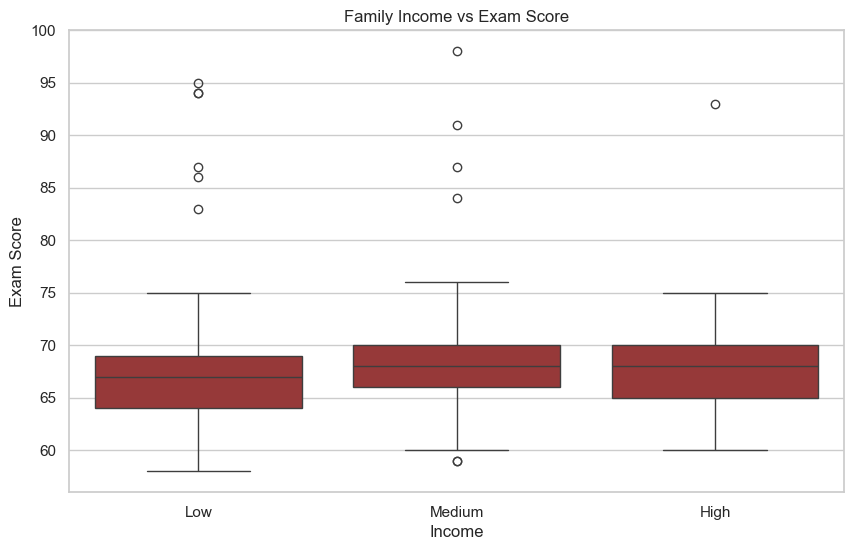

In [48]:
plt.figure(figsize=(10, 6))
df['Family_Income'] = pd.Categorical(df['Family_Income'], categories=['Low', 'Medium', 'High'], ordered=True)
sns.boxplot(x='Family_Income', y='Exam_Score', data=df, color="brown")
plt.title('Family Income vs Exam Score')
plt.xlabel('Income')
plt.ylabel('Exam Score')
plt.show()


1.	Median Exam Scores:
- The median scores for all three income groups (Low, Medium, and High) are quite similar, around 67–70. This indicates that the central performance does not vary significantly across income levels.
2.	Interquartile Range (IQR):
- The IQR (middle 50% of scores) is slightly higher for the Medium and High income groups compared to the Low income group.
- This suggests that scores in higher income groups are more spread out, showing greater variability.
3.	Outliers:
- Outliers (students with exceptionally high scores, above 80) appear in all three income groups.
- However, there are slightly more outliers in the Medium and High income groups, with a few reaching the 95–100 range.

Key Insight:

While family income does not strongly influence the median exam scores, students from Medium and High income groups show more variability in scores, including a higher presence of exceptional performers.

## Numerical Method

For **Hour Studied**

In [49]:
df['Hours_Studied'].describe()

count    969.000000
mean      20.067079
std        5.843397
min        1.000000
25%       16.000000
50%       20.000000
75%       24.000000
max       36.000000
Name: Hours_Studied, dtype: float64

In [71]:
outliners = df[df['Hours_Studied'] < 4]['Hours_Studied']
outliners

1539    3
4725    1
2947    2
Name: Hours_Studied, dtype: int64

For **Attendance**

In [51]:
df['Attendance'].describe()

count    969.000000
mean      80.252838
std       11.755650
min       60.000000
25%       70.000000
50%       80.000000
75%       91.000000
max      100.000000
Name: Attendance, dtype: float64

For **Sleep Hours**

In [52]:
df['Sleep_Hours'].describe()

count    969.000000
mean       6.976264
std        1.497399
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: Sleep_Hours, dtype: float64

For **Previous Scores**

In [53]:
df['Previous_Scores'].describe()

count    969.000000
mean      75.076367
std       14.374577
min       50.000000
25%       63.000000
50%       75.000000
75%       88.000000
max      100.000000
Name: Previous_Scores, dtype: float64

For **Tutoring Sessions**

In [72]:
df['Tutoring_Sessions'].describe()

count    969.000000
mean       1.491228
std        1.226505
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: Tutoring_Sessions, dtype: float64

For **Physical Activity**

In [74]:
df['Physical_Activity'].describe()

count    969.000000
mean       2.969040
std        1.037057
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: Physical_Activity, dtype: float64

For **Exam Score**

In [54]:
df['Exam_Score'].describe()

count    969.000000
mean      67.396285
std        4.127341
min       58.000000
25%       65.000000
50%       67.000000
75%       70.000000
max       98.000000
Name: Exam_Score, dtype: float64

# Correlation Analysis

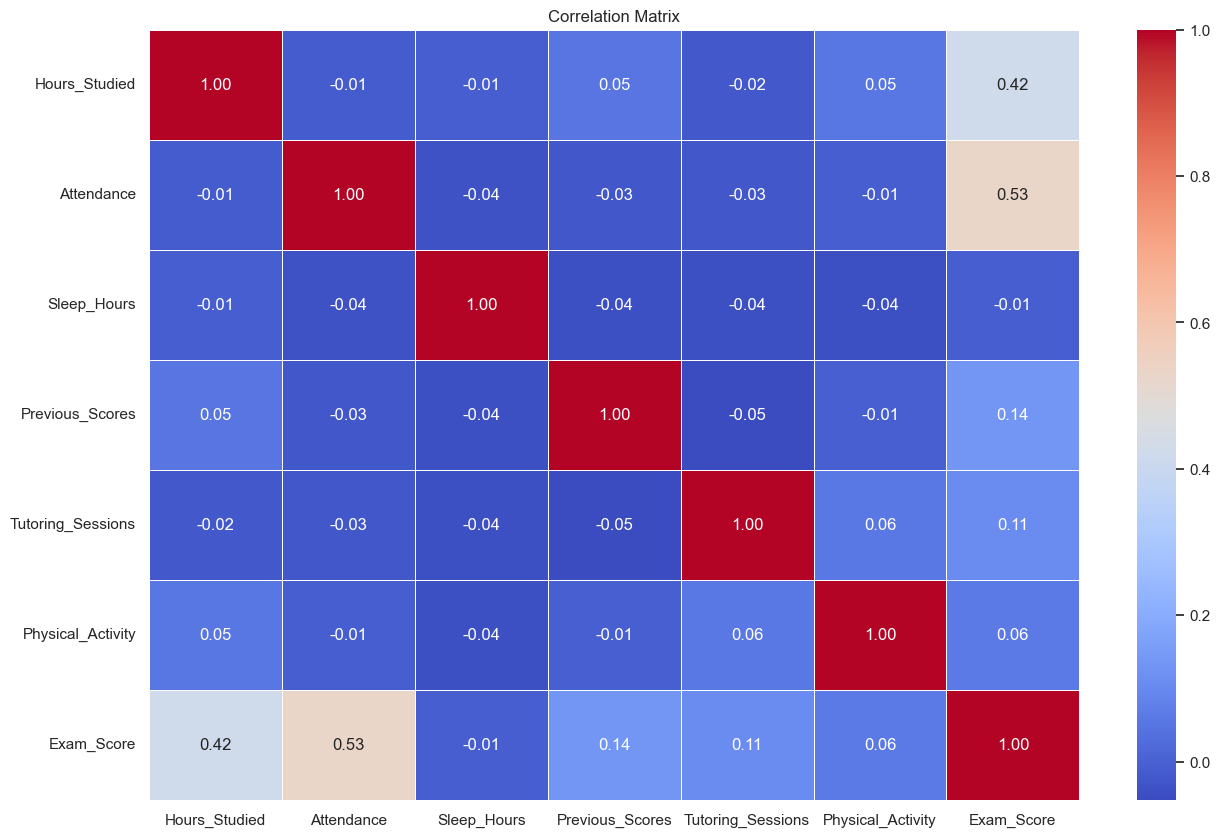

In [56]:
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

df_numeric = df[numeric_cols]
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


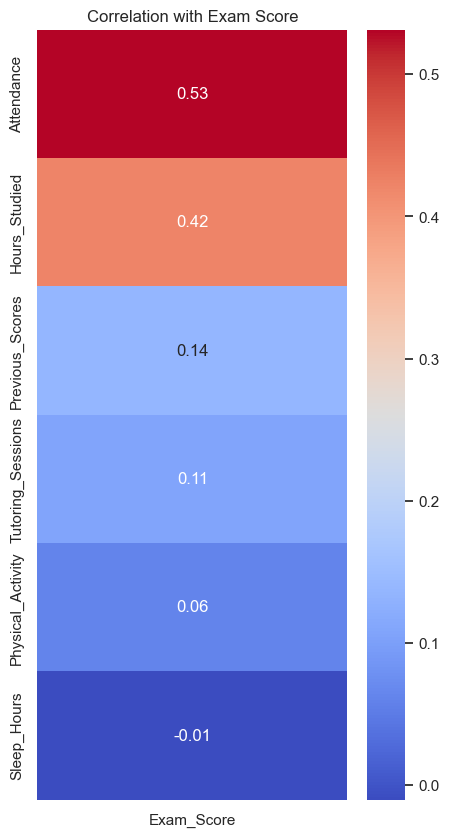

In [57]:
corr = correlation_matrix['Exam_Score'].drop('Exam_Score')
corr_sorted = corr.sort_values(ascending = False)
plt.figure(figsize=(5, 10))
sns.heatmap(corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title(f'Correlation with Exam Score')
plt.show()


# Hypothesis Test

We will conduct 2 hypothesis tests for the relationship between **Exam_Score** and other variables: **T-test** and **ANOVA**.

A **T-test** is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It helps to understand if the differences observed between groups are due to random chance or if they are statistically significant. There are different types of T-tests, including:

1. **Independent T-test**: Compares the means of two independent groups (e.g., test scores of two different classes).
2. **Paired T-test**: Compares the means of two related groups (e.g., test scores of the same group before and after an intervention).
3. **One-sample T-test**: Compares the mean of a single group to a known value or population mean.

The T-test calculates a T-value, which is then used to determine the p-value. If the p-value is less than the chosen significance level, the null hypothesis (no difference) is rejected, indicating a significant difference between the groups.

**Assumptions**
- The data should be approximately normally distributed.
- The variances of the two groups should be equal (for independent T-test).
- The samples should be independent (for independent T-test).


**ANOVA** (Analysis of Variance) is a statistical method used to compare the means of three or more groups to determine if there are any statistically significant differences between them. It helps to understand if the observed differences among group means are due to random chance or if they are statistically significant.

**Key Points**:
- **Purpose**: To test for significant differences between group means.
- **Hypotheses**:
    - Null Hypothesis (\(H_0\)): All group means are equal.
    - Alternative Hypothesis (\(H_1\)): At least one group mean is different.
- **Types**:
    - **One-Way ANOVA**: Compares means of three or more independent (unrelated) groups based on one factor.
    - **Two-Way ANOVA**: Compares means based on two factors, and can also evaluate the interaction between factors.
- **Assumptions**:
    - The populations from which the samples are drawn are normally distributed.
    - Homogeneity of variances: The variances among the groups should be approximately equal.
    - Independence: The samples must be independent of each other.

**ANOVA Output**:
- **F-Statistic**: Ratio of the variance between the group means to the variance within the groups.
- **P-Value**: Probability that the observed differences among group means occurred by chance. If the p-value is less than the chosen significance level (e.g., 0.05), the null hypothesis is rejected.

If the p-value is less than significant level, we reject the null hypothesis and conclude that there are significant differences between the group means.

Test for relationship between **Parental_Involvement** and **Exam_Score**

In [58]:
# Use ANOVA for Parental_Involvement, because there are 3 unique values (groups)
f_stat, p_value = stats.f_oneway(
    df[df['Parental_Involvement'] == 'Low']['Exam_Score'],
    df[df['Parental_Involvement'] == 'Medium']['Exam_Score'],
    df[df['Parental_Involvement'] == 'High']['Exam_Score']
)
f_stat, p_value

(4.559847254389755, 0.010689880355636422)

1.	Statistical Test:
- stats.f_oneway() is used from the scipy.stats module to perform a one-way ANOVA test.
- This test checks if there is a statistically significant difference in the means of “Exam_Score” across the three levels of “Parental_Involvement”.
2.	Input Data:
- The function takes three arguments, each representing the “Exam_Score” values for a specific “Parental_Involvement” level:
- df[df['Parental_Involvement'] == 'Low']['Exam_Score']
- df[df['Parental_Involvement'] == 'Medium']['Exam_Score']
- df[df['Parental_Involvement'] == 'High']['Exam_Score']
3.	Output:
- f_stat: The F-statistic value of the ANOVA test (4.559847254389755).
- p_value: The p-value of the test (0.010689880355636422), which indicates the significance level of the results.
4.	Interpretation:
- A p-value of ~0.01 suggests there is a statistically significant difference in the mean “Exam_Score” between at least two of the “Parental_Involvement” groups at the 5% significance level (￼).
- The null hypothesis (all group means are equal) is rejected.

Further analysis could involve pairwise comparisons (e.g., Tukey’s HSD) to identify which groups differ.

Test for relationship between **Access_to_Resources** and **Exam_Score**

In [59]:
# Use ANOVA for Access_to_Resources, because there are 3 unique values (groups)
f_stat, p_value = stats.f_oneway(
    df[df['Access_to_Resources'] == 'Low']['Exam_Score'],
    df[df['Access_to_Resources'] == 'Medium']['Exam_Score'],
    df[df['Access_to_Resources'] == 'High']['Exam_Score']
)
f_stat, p_value

(13.32987020773159, 1.9469499455992506e-06)

1.	Statistical Test:
- It uses stats.f_oneway() to conduct a one-way ANOVA.
- The test examines whether the mean “Exam_Score” differs significantly across the three groups of “Access_to_Resources”.
2.	Input Data:
- The function analyzes “Exam_Score” data for three categories of “Access_to_Resources”:
- df[df['Access_to_Resources'] == 'Low']['Exam_Score']
- df[df['Access_to_Resources'] == 'Medium']['Exam_Score']
- df[df['Access_to_Resources'] == 'High']['Exam_Score']
3.	Output:
- f_stat: The F-statistic value of the ANOVA test is 13.33.
- p_value: The p-value of the test is 1.946e-06 (very close to 0).
4.	Interpretation:
- The p-value (~1.95e-06) indicates a statistically significant difference in the mean “Exam_Score” among the three groups, as it is much smaller than the typical significance level (￼).
- The null hypothesis (equal means across all groups) is rejected with high confidence.


Test for relationship between **Extracurricular_Activities** and **Exam_Score**

In [60]:
# using t-test for Extracurricular_Activities, 
# because there are 2 unique values (groups)
t_stat, p_value = stats.ttest_ind(
    df[df['Extracurricular_Activities'] == 'No']['Exam_Score'],
    df[df['Extracurricular_Activities'] == 'Yes']['Exam_Score']
)
t_stat, p_value

(-1.5675303479784688, 0.11731793334547354)

This code performs a two-sample t-test to assess whether there is a significant difference in the “Exam_Score” based on participation in “Extracurricular_Activities” (‘Yes’ vs. ‘No’). Here’s the interpretation:
1.	Statistical Test:
- It uses stats.ttest_ind() for an independent two-sample t-test.
- The test evaluates whether the means of “Exam_Score” differ between two groups: students who participated in extracurricular activities and those who did not.
2.	Input Data:
- no_extra_score: Exam scores of students who answered “No” to “Extracurricular_Activities”.
- extra_score: Exam scores of students who answered “Yes”.
3.	Output:
- t_stat_extra: The t-statistic value is -1.57, indicating the direction and magnitude of the difference.
- p_value_extra: The p-value is 0.117, which represents the probability of observing the data assuming the null hypothesis (no difference in means) is true.
4.	Interpretation:
- The p-value (0.117) is greater than the typical significance level (￼).
- This means there is no statistically significant difference in “Exam_Score” between the two groups.
- The null hypothesis (that the means are equal) cannot be rejected.
5.	Conclusion:
- There is no sufficient evidence to conclude that participation in “Extracurricular_Activities” affects “Exam_Score”. Further investigation or a larger sample size might be needed to detect smaller effects.

Test for relationship between **Motivation_Level** and **Exam_Score**

In [61]:
# Use ANOVA for Motivation_Level, because there are 3 unique values (groups)
f_stat, p_value = stats.f_oneway(
    df[df['Motivation_Level'] == 'Low']['Exam_Score'],
    df[df['Motivation_Level'] == 'Medium']['Exam_Score'],
    df[df['Motivation_Level'] == 'High']['Exam_Score']
)
f_stat, p_value

(4.310273280329581, 0.013689110950733056)

1.	Statistical Test:
- stats.f_oneway() is used for a one-way ANOVA test.
- The test assesses whether the mean “Exam_Score” differs across the three levels of “Motivation_Level” (‘Low’, ‘Medium’, ‘High’).
2.	Input Data:
- Three groups of “Exam_Score” are tested:
- df[df['Motivation_Level'] == 'Low']['Exam_Score']
- df[df['Motivation_Level'] == 'Medium']['Exam_Score']
- df[df['Motivation_Level'] == 'High']['Exam_Score']
3.	Output:
- f_stat: The F-statistic value is 4.31, indicating the strength of the variation between group means compared to the variation within groups.
- p_value: The p-value is 0.0137, which is below the common significance level (￼).
4.	Interpretation:
- The p-value (0.0137) indicates a statistically significant difference in “Exam_Score” across the three “Motivation_Level” groups.
- The null hypothesis (that all group means are equal) is rejected at the 5% significance level.
5.	Conclusion:
- “Motivation_Level” has a significant effect on “Exam_Score.”

Test for relationship between **Internet_Access** and **Exam_Score**

In [62]:
# using t-test for Internet_Access, because there are 2 unique values (groups)
t_stat, p_value = stats.ttest_ind(
    df[df['Internet_Access'] == 'No']['Exam_Score'],
    df[df['Internet_Access'] == 'Yes']['Exam_Score']
)
t_stat, p_value

(-1.4059496775049882, 0.16006029863305962)

1.	Statistical Test:
- The stats.ttest_ind() function is used for an independent two-sample t-test.
- It compares the mean “Exam_Score” of students with and without “Internet_Access”.
2.	Input Data:
- The data is split into two groups based on “Internet_Access”:
- Students without Internet Access (df[df['Internet_Access'] == 'No']['Exam_Score']).
- Students with Internet Access (df[df['Internet_Access'] == 'Yes']['Exam_Score']).
3.	Output:
- t_stat: The t-statistic value is -1.406, indicating the direction and magnitude of the difference in means.
- p_value: The p-value is 0.160, which represents the probability of observing the data under the null hypothesis (equal means).
4.	Interpretation:
- The p-value (0.160) is greater than the standard significance level (￼).
- This means there is no statistically significant difference in “Exam_Score” between students with and without “Internet_Access.”
5.	Conclusion:
- There is insufficient evidence to suggest that “Internet_Access” affects “Exam_Score.”
- The null hypothesis (that the means are equal) cannot be rejected. Further analysis or additional data might help clarify this relationship.

Test for relationship between **Family_Income** and **Exam_Score**

In [63]:
# Use ANOVA for Family_Income, because there are 3 unique values (groups)
f_stat, p_value = stats.f_oneway(
    df[df['Family_Income'] == 'Low']['Exam_Score'],
    df[df['Family_Income'] == 'Medium']['Exam_Score'],
    df[df['Family_Income'] == 'High']['Exam_Score']
)
f_stat, p_value

(8.233740362035459, 0.00028462237294358124)

1.	Statistical Test:
- The stats.f_oneway() function is used to test whether the mean “Exam_Score” differs significantly across the three levels of “Family_Income” (‘Low’, ‘Medium’, ‘High’).
2.	Input Data:
- The groups are divided based on “Family_Income”:
- Students with ‘Low’ income (df[df['Family_Income'] == 'Low']['Exam_Score']).
- Students with ‘Medium’ income (df[df['Family_Income'] == 'Medium']['Exam_Score']).
- Students with ‘High’ income (df[df['Family_Income'] == 'High']['Exam_Score']).
3.	Output:
- f_stat: The F-statistic is 8.23, indicating a strong difference between the group means relative to within-group variability.
- p_value: The p-value is 0.00028, which is much smaller than the common significance level (￼).
4.	Interpretation:
- The p-value (0.00028) indicates a statistically significant difference in “Exam_Score” among the three “Family_Income” groups.
- The null hypothesis (equal means across all groups) is rejected at a very high confidence level.
5.	Conclusion:
- “Family_Income” has a significant effect on “Exam_Score.”


Test for relationship between **Teacher_Quality** and **Exam_Score**

In [64]:
# Use ANOVA for Teacher_Quality, because there are 3 unique values (groups)
f_stat, p_value = stats.f_oneway(
    df[df['Teacher_Quality'] == 'Low']['Exam_Score'],
    df[df['Teacher_Quality'] == 'Medium']['Exam_Score'],
    df[df['Teacher_Quality'] == 'High']['Exam_Score']
)
f_stat, p_value

(0.6002202553051982, 0.5488952706457905)

1.	Statistical Test:
- The stats.f_oneway() function is used to test whether the mean “Exam_Score” differs significantly across the three levels of “Teacher_Quality” (‘Low’, ‘Medium’, ‘High’).
2.	Input Data:
- The dataset is divided into three groups:
- Students with ‘Low’ teacher quality (df[df['Teacher_Quality'] == 'Low']['Exam_Score']).
- Students with ‘Medium’ teacher quality (df[df['Teacher_Quality'] == 'Medium']['Exam_Score']).
- Students with ‘High’ teacher quality (df[df['Teacher_Quality'] == 'High']['Exam_Score']).
3.	Output:
- f_stat: The F-statistic value is 0.60, which suggests minimal variation between group means compared to within-group variation.
- p_value: The p-value is 0.5489, which is much higher than the common significance threshold (￼).
4.	Interpretation:
- The p-value (0.5489) indicates no statistically significant difference in “Exam_Score” among the three “Teacher_Quality” groups.
- The null hypothesis (that all group means are equal) cannot be rejected.
5.	Conclusion:
- “Teacher_Quality” does not have a statistically significant effect on “Exam_Score” based on the data.
- No further post-hoc tests are needed, as the group differences are not significant.

Test for relationship between **School_Type** and **Exam_Score**

In [65]:
# using t-test for School_Type, because there are 2 unique values (groups)
t_stat, p_value = stats.ttest_ind(
    df[df['School_Type'] == 'Public']['Exam_Score'],
    df[df['School_Type'] == 'Private']['Exam_Score']
)
t_stat, p_value

(0.9374833497568414, 0.34874406354672727)

1.	Statistical Test:
- The stats.ttest_ind() function is used for an independent two-sample t-test.
- It compares the mean “Exam_Score” between students from ‘Public’ and ‘Private’ school types.
2.	Input Data:
- Two groups are analyzed:
- Students in ‘Public’ schools (df[df['School_Type'] == 'Public']['Exam_Score']).
- Students in ‘Private’ schools (df[df['School_Type'] == 'Private']['Exam_Score']).
3.	Output:
- t_stat: The t-statistic value is 0.937, indicating the magnitude and direction of the mean difference.
- p_value: The p-value is 0.3487, which represents the probability of observing the data assuming the null hypothesis (no difference in means) is true.
4.	Interpretation:
- The p-value (0.3487) is greater than the standard significance threshold (￼).
- This means there is no statistically significant difference in “Exam_Score” between students from ‘Public’ and ‘Private’ schools.
5.	Conclusion:
- “School_Type” does not significantly affect “Exam_Score” based on the data provided.

Test for relationship between **Peer_Influence** and **Exam_Score**

In [66]:
# Use ANOVA for Peer_Influence, because there are 3 unique values (groups)
f_stat, p_value = stats.f_oneway(
    df[df['Peer_Influence'] == 'Neutral']['Exam_Score'],
    df[df['Peer_Influence'] == 'Positive']['Exam_Score'],
    df[df['Peer_Influence'] == 'Negative']['Exam_Score']
)
f_stat, p_value

(8.713948300376845, 0.00017754692133544318)

1.	Statistical Test:
- The stats.f_oneway() function is used to compare the mean “Exam_Score” across the three levels of “Peer_Influence” (‘Neutral’, ‘Positive’, ‘Negative’).
2.	Input Data:
- The data is divided into three groups:
- Students with ‘Neutral’ peer influence (df[df['Peer_Influence'] == 'Neutral']['Exam_Score']).
- Students with ‘Positive’ peer influence (df[df['Peer_Influence'] == 'Positive']['Exam_Score']).
- Students with ‘Negative’ peer influence (df[df['Peer_Influence'] == 'Negative']['Exam_Score']).
3.	Output:
- f_stat: The F-statistic is 8.71, suggesting a substantial difference between group means relative to within-group variation.
- p_value: The p-value is 0.00018, which is much smaller than the significance threshold (￼).
4.	Interpretation:
- The p-value (0.00018) indicates a statistically significant difference in “Exam_Score” across the three “Peer_Influence” groups.
- The null hypothesis (that all group means are equal) is rejected with very high confidence.
5.	Conclusion:
- “Peer_Influence” significantly affects “Exam_Score.”


Test for relationship between **Learning_Disabilities** and **Exam_Score**

In [67]:
# using t-test for Learning_Disabilities, because 
# there are 2 unique values (groups)
t_stat, p_value = stats.ttest_ind(
    df[df['Learning_Disabilities'] == 'No']['Exam_Score'],
    df[df['Learning_Disabilities'] == 'Yes']['Exam_Score']
)
t_stat, p_value

(3.4796932747176106, 0.0005243901229253358)

1.	Statistical Test:
- The stats.ttest_ind() function is used to compare the mean “Exam_Score” between students with and without “Learning_Disabilities.”
2.	Input Data:
- Two groups are analyzed:
- Students without learning disabilities (df[df['Learning_Disabilities'] == 'No']['Exam_Score']).
- Students with learning disabilities (df[df['Learning_Disabilities'] == 'Yes']['Exam_Score']).
3.	Output:
- t_stat: The t-statistic value is 3.48, indicating a notable difference in group means.
- p_value: The p-value is 0.00052, which represents the probability of observing the data under the null hypothesis (no difference in means).
4.	Interpretation:
- The p-value (0.00052) is much smaller than the standard significance threshold (￼).
- This indicates a statistically significant difference in “Exam_Score” between students with and without learning disabilities.
5.	Conclusion:
- “Learning_Disabilities” significantly affects “Exam_Score.”
- The null hypothesis (that there is no difference in means) is rejected with high confidence. This suggests further analysis to understand the nature and implications of this difference might be beneficial.

Test for relationship between **Parental_Education_Level** and **Exam_Score**

In [68]:
# Use ANOVA for Parental_Education_Level, 
# because there are 3 unique values (groups)
f_stat, p_value = stats.f_oneway(
    df[df['Parental_Education_Level'] == 'High School']['Exam_Score'],
    df[df['Parental_Education_Level'] == 'College']['Exam_Score'],
    df[df['Parental_Education_Level'] == 'Postgraduate']['Exam_Score']
)
f_stat, p_value

(2.253394819080884, 0.10559390768557786)

1.	Statistical Test:
- The stats.f_oneway() function is used to test for differences in the mean “Exam_Score” across three levels of “Parental_Education_Level” (‘High School’, ‘College’, ‘Postgraduate’).
2.	Input Data:
- The data is grouped by parental education levels:
- ‘High School’ (df[df['Parental_Education_Level'] == 'High School']['Exam_Score']).
- ‘College’ (df[df['Parental_Education_Level'] == 'College']['Exam_Score']).
- ‘Postgraduate’ (df[df['Parental_Education_Level'] == 'Postgraduate']['Exam_Score']).
3.	Output:
- f_stat: The F-statistic value is 2.25, which measures the variance between group means relative to the variance within groups.
- p_value: The p-value is 0.1056, which represents the probability of observing the data under the null hypothesis (no difference in means).
4.	Interpretation:
- The p-value (0.1056) is greater than the standard significance threshold (￼).
- This indicates no statistically significant difference in “Exam_Score” among the three “Parental_Education_Level” groups.
5.	Conclusion:
- “Parental_Education_Level” does not have a significant effect on “Exam_Score” based on the data.
- No further post-hoc tests are necessary as the group differences are not statistically significant.

Test for relationship between **Distance_From_Home** and **Exam_Score**

In [69]:
# Use ANOVA for Distance_from_Home, because there are 3 unique values (groups)
f_stat, p_value = stats.f_oneway(
    df[df['Distance_from_Home'] == 'Near']['Exam_Score'],
    df[df['Distance_from_Home'] == 'Moderate']['Exam_Score'],
    df[df['Distance_from_Home'] == 'Far']['Exam_Score']
)
f_stat, p_value

(2.884129774500926, 0.056384954346706824)

1.	Statistical Test:
- The stats.f_oneway() function is used to compare the mean “Exam_Score” across three categories of “Distance_from_Home” (‘Near’, ‘Moderate’, ‘Far’).
2.	Input Data:
- The data is grouped based on the distance:
- ‘Near’ (df[df['Distance_from_Home'] == 'Near']['Exam_Score']).
- ‘Moderate’ (df[df['Distance_from_Home'] == 'Moderate']['Exam_Score']).
- ‘Far’ (df[df['Distance_from_Home'] == 'Far']['Exam_Score']).
3.	Output:
- f_stat: The F-statistic is 2.88, indicating the ratio of between-group variance to within-group variance.
- p_value: The p-value is 0.0564, which represents the probability of observing the data under the null hypothesis (no difference in means).
4.	Interpretation:
- The p-value (0.0564) is slightly greater than the standard significance threshold (￼).
- This suggests that the differences in “Exam_Score” between the groups are not statistically significant at the 5% level. However, it is close enough to warrant further investigation.
5.	Conclusion:
- “Distance_from_Home” does not have a statistically significant impact on “Exam_Score” based on this data.

Test for relationship between **Gender** and **Exam_Score**

In [70]:
# using t-test for Gender, because there are 2 unique values (groups)
t_stat, p_value = stats.ttest_ind(
    df[df['Gender'] == 'Male']['Exam_Score'],
    df[df['Gender'] == 'Female']['Exam_Score']
)
t_stat, p_value

(-0.2918770044692772, 0.7704432699050765)

This code performs a two-sample t-test to evaluate whether “Gender” affects “Exam_Score.” Here’s the interpretation:
1.	Statistical Test:
- The stats.ttest_ind() function is used to compare the mean “Exam_Score” between two gender groups: ‘Male’ and ‘Female.’
2.	Input Data:
- The data is divided into two groups:
- ‘Male’ (df[df['Gender'] == 'Male']['Exam_Score']).
- ‘Female’ (df[df['Gender'] == 'Female']['Exam_Score']).
3.	Output:
- t_stat: The t-statistic is -0.2919, indicating the magnitude and direction of the mean difference.
- p_value: The p-value is 0.7704, which represents the probability of observing the data under the null hypothesis (no difference in means).
4.	Interpretation:
- The p-value (0.7704) is much larger than the standard significance threshold (￼).
- This indicates no statistically significant difference in “Exam_Score” between males and females.
5.	Conclusion:
- “Gender” does not significantly affect “Exam_Score” based on the data.
- No further analysis or follow-up tests are necessary.